In [1]:
from nilm_pre_processing import NilmPreProcessing
import os
import polars as pl
import pandas as pd

In [2]:
base_path = "/opt/nilm-shared-data/nilm_device_detection/other_dataset/iawe/transform_data"
nilm_pp = NilmPreProcessing()

# Device labeling

## Cách lọc 

- Air conditioner -> lọc tay hoàn toàn.
- Máy tính, motor, television -> bỏ qua.
- Còn lại -> lọc 1 phần bằng máy
    - Clothes iron: OK
    - Fridge: OK
    - Wet appliances: OK
    - Washing machine: OK

__For conditioners__

In [3]:
# df = pd.read_csv(f"{base_path}/air_conditioner_2_iawe.csv")
# print(len(df))
# device_name = "air_conditioner_2"

# # Define the number of partitions (output files)
# n_partitions = 20  # Adjust as needed

# # Split the data and write to separate Excel files
# for i in range(n_partitions):
#     start_row = i * len(df) // n_partitions
#     end_row = (i + 1) * len(df) // n_partitions
#     sub_df = df.iloc[start_row:end_row]
#     output_file = f'{device_name}_{i}.xlsx'
#     sub_df.to_excel(os.path.join("/opt/nilm-shared-data/nilm_device_detection/other_dataset/iawe/running_segments/air_conditioner_2", 
#                                  output_file), index=False)

328405


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7bc480be0a90>>
Traceback (most recent call last):
  File "/opt/miniconda3/envs/nilmtk-env/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


__For other devices__

In [3]:
df = pl.read_csv(f"{base_path}/fridge_iawe.csv")
print(len(df))
device_name = "fridge"
unit_name = "Watts (W)"

2764859


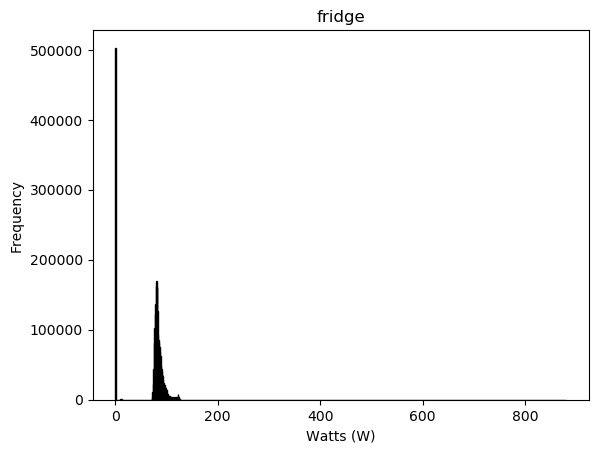

In [4]:
nilm_pp.plot_distribution(array=df["P"].to_numpy(), 
                          plot_name=device_name, 
                          unit_name=unit_name,
                          min=None,
                          max=None)

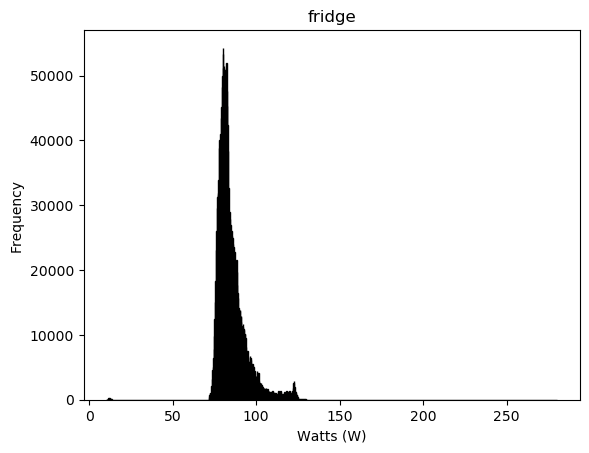

In [5]:
nilm_pp.plot_distribution(array=df["P"].to_numpy(), 
                          plot_name=device_name, 
                          unit_name=unit_name,
                          min=10,
                          max=300)

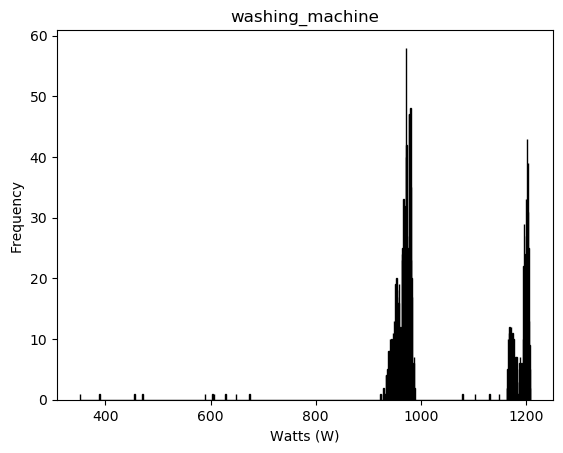

In [7]:
nilm_pp.plot_distribution(array=df["P"].to_numpy(), 
                          plot_name=device_name, 
                          unit_name=unit_name,
                          min=300,
                          max=None)

In [8]:
running_segments = nilm_pp.get_running_segments(input_df=df, min_length=20, smallest_threshold=100)
print(len(running_segments))

Processing segments: 100%|██████████| 47/47 [00:00<00:00, 3020.58it/s]

20


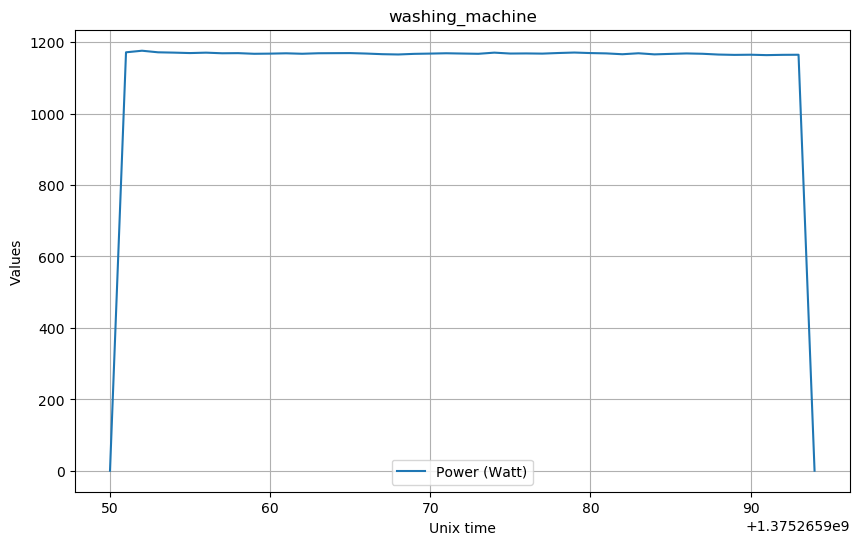

In [11]:
nilm_pp.plot_data_with_time(df=running_segments[19], device_name=device_name, start=None, end=None) 

In [15]:
from tqdm import tqdm
output_path = f"/opt/nilm-shared-data/nilm_device_detection/other_dataset/iawe/running_segments/{device_name}"
if not os.path.exists(output_path):
    os.makedirs(output_path)
for i in tqdm(range(len(running_segments))):
    clothes_dryer_df = running_segments[i]
    clothes_dryer_df.to_pandas().to_excel(os.path.join(output_path, f"{device_name}_{i}.xlsx"))

100%|██████████| 20/20 [00:01<00:00, 10.25it/s]
